In [1]:
%matplotlib notebook

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy.ma as ma
from scipy.interpolate import griddata 
import matplotlib
from mpl_toolkits.axes_grid1 import Divider, Size 
from mpl_toolkits.axes_grid1.mpl_axes import Axes
print('matplotlib: {}'.format(matplotlib.__version__))

import os

matplotlib: 3.7.0


In [3]:
def Q2th (deg,lam): # function to convert 2theta into scattering vector, Q
	
	return 4.0*np.pi*np.sin(deg/360.0*np.pi)/lam

<IPython.core.display.Javascript object>


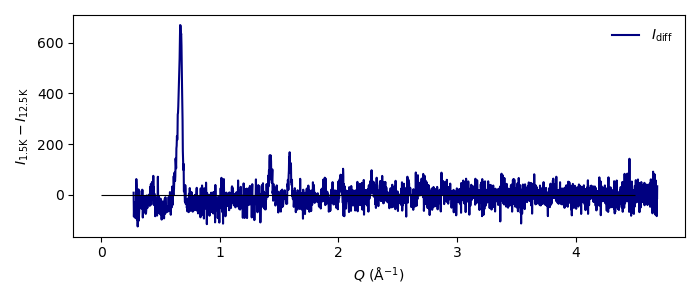

In [6]:
fig = plt.figure(1, figsize=(7, 3))
ax1 = plt.subplot()

d1p5K = np.genfromtxt('FeCl2pym_1p5K_2p41A_4hours.dat')
d12p5K = np.genfromtxt('FeCl2pym_12p5K_2p41A_4hours.dat')
err = np.sqrt((d1p5K[:,2])**2 + (d12p5K[:,2])**2)

diff = (d1p5K[:,1] - d12p5K[:,1])

dQ = Q2th(d1p5K[:,0],2.41)

plt.plot(dQ,diff, label='$I_{\mathrm{diff}}$', color='navy')#, s=4)


plt.hlines(0,0,4.5, color='k', linewidth=0.8)

ax1.set_xlabel(r'$\mathit{Q}$ (Å$^{-1}$)')
ax1.set_ylabel('$I_{\mathrm{1.5 K}}-I_{\mathrm{12.5 K}}$')
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.show()

#DataOut = np.column_stack((d1p5K[:,0],diff,err))
#np.savetxt('Fe_diff_1p5K-12p5K.xye', DataOut)

<IPython.core.display.Javascript object>


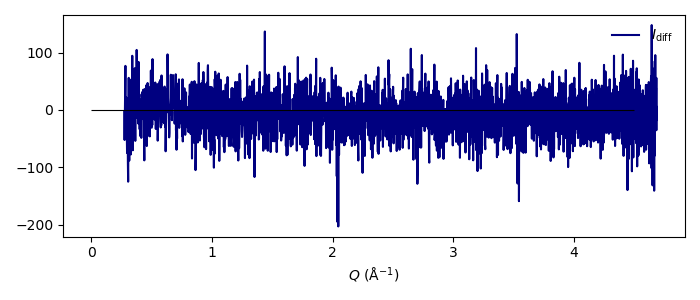

In [8]:
fig = plt.figure(100, figsize=(7, 3))
ax1 = plt.subplot()

d25K = np.genfromtxt('FeCl2pym_25K_2p41A_2hours.dat')
d12p5K = np.genfromtxt('FeCl2pym_12p5K_2p41A_4hours.dat')
err = np.sqrt((d25K[:,2])**2 + (d12p5K[:,2])**2)

diff = (d12p5K[:,1] - d25K[:,1])

dQ = Q2th(d25K[:,0],2.41)

plt.plot(dQ,diff, label='$I_{\mathrm{diff}}$', color='navy')#, s=4)

plt.hlines(0,0,4.5, color='k', linewidth=0.8)

ax1.set_xlabel(r'$\mathit{Q}$ (Å$^{-1}$)')
plt.legend(frameon=False, loc='upper right')
#plt.savefig('FeCl2pym_1p5K-12p5K.pdf' ,bbox_inches='tight') #The output of your plot as an image or a pdf
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


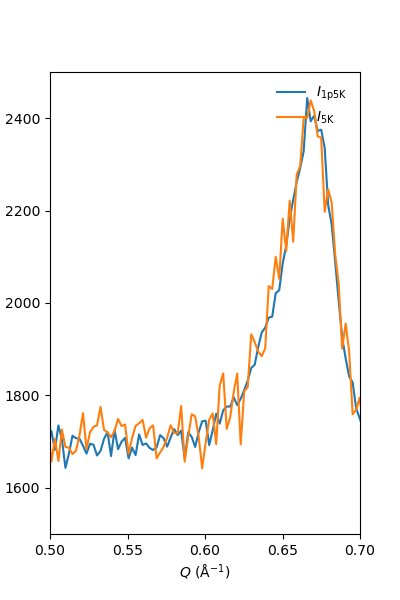

In [10]:
fig = plt.figure(7, figsize=(4,6))
ax1 = plt.subplot()

#fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
#fig.subplots_adjust(hspace=0.01)  # adjust space between axes

d5K = np.genfromtxt('./VT/FeCl2pym_1hour_5K.dat')
d6K = np.genfromtxt('./VT/FeCl2pym_1hour_6K.dat')
d7K = np.genfromtxt('./VT/FeCl2pym_1hour_7K.dat')
d8K = np.genfromtxt('./VT/FeCl2pym_1hour_8K.dat')
d9K = np.genfromtxt('./VT/FeCl2pym_1hour_9K.dat')
d9p5K = np.genfromtxt('./VT/FeCl2pym_1hour_9p5K.dat')
d10K = np.genfromtxt('./VT/FeCl2pym_1hour_10K.dat')
d10p5K = np.genfromtxt('./VT/FeCl2pym_1hour_10p5K.dat')
d11K = np.genfromtxt('./VT/FeCl2pym_1hour_11K.dat')
d12K = np.genfromtxt('./VT/FeCl2pym_1hour_12K.dat')
d13K = np.genfromtxt('./VT/FeCl2pym_1hour_13K.dat')
d14K = np.genfromtxt('./VT/FeCl2pym_1hour_14K.dat')
d15K = np.genfromtxt('./VT/FeCl2pym_1hour_15K.dat')

ax1.plot(Q2th(d1p5K[:,0],2.41),d1p5K[:,1], label='$I_{\mathrm{1p5 K}}$')
ax1.plot(Q2th(d5K[:,0],2.41),d5K[:,1], label='$I_{\mathrm{5 K}}$')#, s=4)

ax1.set_xlabel(r'$Q$ (Å$^{-1}$)')
ax1.set_ylabel('$I$')
ax1.set_xlim((0.5,0.7))
ax1.set_ylim((1500,2500))
plt.legend(frameon=False, loc='upper right', ncol=1)
#plt.savefig('FeCl2pym_PND_xeroji_1p5K_5K.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [11]:
T=np.array([5,6,7,8,9,9.5,10,10.5,11,12])
Ts=np.array([5,6,7,8,9,9.5,10,10.5,11,12,13,14,15])
print(len(T))

10


In [12]:
Q = Q2th(d5K[:,0],2.41)
print(len(Q))
s = np.argmax(Q>0.66)
f = np.argmax(Q>0.67)
print(s,f)

2439
171 175


In [13]:
QGrid, TGrid = np.meshgrid(Q, T)
print(QGrid.shape)

(10, 2439)


In [14]:
y = len(Q)
T_g = np.repeat(T, y)
print(T_g.shape)

x= len(T)
Q_g = np.tile(Q, x)
print(Q_g.shape)

(24390,)
(24390,)


In [15]:
I = np.concatenate([d5K[:,1], d6K[:,1], d7K[:,1], d8K[:,1], d9K[:,1], d9p5K[:,1], d10K[:,1], d10p5K[:,1], d11K[:,1], d12K[:,1]])
print(I.shape)

Is = np.stack([d5K[:,1], d6K[:,1], d7K[:,1], d8K[:,1], d9K[:,1], d9p5K[:,1], d10K[:,1], d10p5K[:,1], d11K[:,1], d12K[:,1], d13K[:,1], d14K[:,1], d15K[:,1]])
print(Is.shape)

es = np.stack([d5K[:,2], d6K[:,2], d7K[:,2], d8K[:,2], d9K[:,2], d9p5K[:,2], d10K[:,2], d10p5K[:,2], d11K[:,2], d12K[:,2], d13K[:,2], d14K[:,2], d15K[:,2]])
es = es[:,s:f]
es = es.sum(axis=1)
print(es.shape)

Is = Is[:,s:f]
Is = Is.sum(axis=1)
print(Is.shape)

(24390,)
(13, 2439)
(13,)
(13,)


In [16]:
IGrid = griddata((Q_g, T_g), I, (QGrid, TGrid))
IGrid = IGrid/2440

<IPython.core.display.Javascript object>


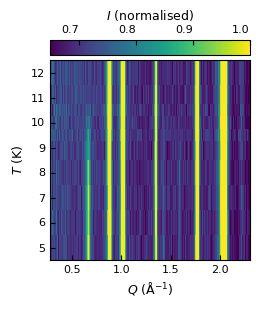

<function matplotlib.pyplot.show(*, block=None)>

In [17]:
fig = plt.figure(8, figsize=(2.6, 3.1))
h = [Size.Fixed(0.5), Size.Fixed(2)] #dimensions of the two horizontal divisions, 0.5 inch margin, 2 inch axis
v = [Size.Fixed(0.5), Size.Fixed(2), Size.Fixed(0.05), Size.Fixed(0.15)]  #dimensions of the four vertical divisions, 0.5 inch margin, 2 inch axis, 0.05 inch padding, 0.15 inch colorbar

rect = (0, 0, 1, 1) #this is to tell the divider to divide over the whole figure area

divider = Divider(fig, rect, h, v, aspect=False) #generating the divisions from h, v and rect

ax = fig.add_axes(divider.get_position(), axes_class=Axes) #creating the axes for the data plot
ax.set_axes_locator(divider.new_locator(nx=1, ny=1))  #this places ax in the 2nd horizontal and 2nd vertical divisions
ax.tick_params(axis='both', labelsize=8, direction="in")
#ax.set_yticks([0,1,2,3,4,5,6])
#ax.set_xticks([0.5,1,1.5])
cmap = matplotlib.colormaps.get_cmap('viridis')
plt.pcolormesh(QGrid,TGrid,IGrid,cmap=cmap,shading='auto',vmin=0.65,vmax=1)

ax_cb = fig.add_axes(divider.get_position(), axes_class=Axes, label="cb") #creating the axes for the colorbar
ax_cb.set_axes_locator(divider.new_locator(nx=1, ny=3)) #this places ax_cb in the 2nd horizontal and 4th vertical divisions
ax_cb.axis["left"].toggle(all=False)
ax_cb.axis["right"].toggle(ticks=True, label=True)
ax_cb.tick_params(axis='both', labelsize=8, direction="in")
plt.rcParams['axes.labelsize'] = 9
plt.colorbar(cax=ax_cb,location="top", use_gridspec=False).set_label(label='$I$ (normalised)',size=9)
plt.setp( ax_cb.xaxis.get_majorticklabels(), ha="right" )

ax.set_xlim(0.28,2.3)
#ax.set_ylim(0,7)
ax.set_xlabel('$Q$ (Å$^{-1}$)', fontsize=9)
ax.set_ylabel('$T$ (K)', fontsize=9)
plt.rcParams['pdf.fonttype'] = 3
#plt.savefig('FeCl2pym_PND_xeroji_Tdep.pdf', bbox_inches='tight', transparent=True)
plt.show

<IPython.core.display.Javascript object>


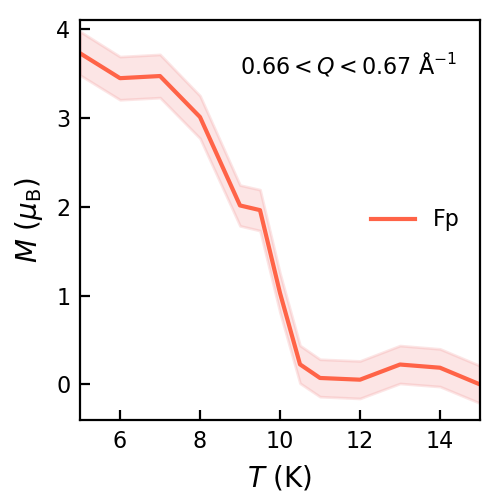

In [31]:
fig = plt.figure(figsize=(2.5, 2.5))
ax_len=2
h = [Size.Fixed(0.4), Size.Fixed(ax_len)]
v = [Size.Fixed(0.4), Size.Fixed(ax_len)]

divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)
ax1 = fig.add_axes(divider.get_position(),axes_locator=divider.new_locator(nx=1, ny=1))
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 8
ax1.tick_params(axis='both', labelsize=8, direction="in")

Ms = (Is-np.amin(Is))/(np.amax(Is)-np.amin(Is))*3.726
Mes = (es/(np.amax(Is)-np.amin(Is)))*3.726

plt.fill_between(Ts, (Ms - Mes), (Ms + Mes), color='lightcoral', alpha=0.2)
ax1.plot (Ts,Ms, c='tomato',label='Fp')


ax1.text(9, 3.5, '$0.66<Q<0.67$ Å$^{-1}$', fontsize=8)
ax1.set_xlabel('$T$ (K)')
ax1.set_ylabel('$M$ ($\mu_\mathrm{B}$)')
ax1.set_xlim((5,15))
ax1.set_ylim((-0.4,4.1))
ax1.set_yticks([0,1,2,3,4])
plt.legend(frameon=False, loc=5)
#plt.savefig('Fe-pym_PND_Tdep.pdf',bbox_inches='tight', transparent=True)
plt.show()